In [1]:
%matplotlib inline

import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.utils as utils


In [2]:
# Set up connection to the DB
conn = db.Database('observations.sqlite')
outDir='output'

In [3]:
conn.columnNames

{'observations': ['index',
  'filter',
  'ra',
  'dec',
  'mjd',
  'exptime',
  'alt',
  'az',
  'skybrightness',
  'seeing',
  'night',
  'slewtime',
  'fivesigmadepth',
  'airmass',
  'sunAlt',
  'moonAlt']}

In [4]:
bundleList = []

slicer = slicers.HealpixSlicer(nside=64, latCol='zenithDistance', lonCol='az', useCache=False)
stacker = stackers.ZenithDistStacker(altCol='alt')
sql = ''
metric = metrics.CountMetric('mjd', metricName='Nvisits as function of Alt/Az')
plotFuncs = [plots.LambertSkyMap()]
bundle = metricBundles.MetricBundle(metric, slicer, sql, plotFuncs=plotFuncs, stackerList=[stacker])
bundleList.append(bundle)

slicer = slicers.HealpixSlicer(latCol='dec', lonCol='ra')
filters = ['u', 'g', 'r', 'i','z', 'y']
sqls = ['filter = "%s"' % filtername for filtername in filters]
for sql in sqls:
    metric = metrics.MedianMetric(col='fivesigmadepth')
    bundle = metricBundles.MetricBundle(metric, slicer, sql)
    bundleList.append(bundle)
    
sqls.append('')
filters.append('all')
for sql,filtername in zip(sqls,filters):
    metric = metrics.CountMetric('mjd', metricName='Count_%s' % filtername)
    bundle = metricBundles.MetricBundle(metric, slicer, sql)
    bundleList.append(bundle)
    

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


In [5]:
slicer = slicers.OneDSlicer(sliceColName='night', binsize=1)
metric = metrics.OpenShutterFractionMetric(slewTimeCol='slewtime', expTimeCol='exptime', visitTimeCol='exptime')
sql=''
bundle = metricBundles.MetricBundle(metric, slicer, sql)
bundleList.append(bundle)


slicer=slicers.UniSlicer()
bundle = metricBundles.MetricBundle(metric, slicer, sql)
bundleList.append(bundle)

slicer=slicers.UniSlicer()
metric = metrics.MeanMetric(col='slewtime')
bundle = metricBundles.MetricBundle(metric, slicer, sql)
bundleList.append(bundle)


slicer = slicers.OneDSlicer(sliceColName='slewtime', binsize=2)
metric = metrics.CountMetric(col='slewtime', metricName='Slew Time Histogram')
bundle = metricBundles.MetricBundle(metric, slicer, sql, plotDict={'logScale':True, 'ylabel':'Count'})
bundleList.append(bundle)



In [6]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
group = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir)

In [7]:
group.runAll()

Querying database observations with no constraint for columns ['ra', 'az', 'exptime', 'alt', 'slewtime', 'night', 'dec', 'mjd'].
Found 309184 visits
Running:  ['opsim_Nvisits_as_function_of_Alt_Az_HEAL']
Completed metric generation.
Running:  ['opsim_Count_all_HEAL']
Completed metric generation.
Running:  ['opsim_OpenShutterFraction_ONED']
Completed metric generation.
Running:  ['opsim_OpenShutterFraction_UNIS', 'opsim_Mean_slewtime_UNIS']
Completed metric generation.
Running:  ['opsim_Slew_Time_Histogram_ONED']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database observations with constraint filter = "i" for columns ['ra', 'fivesigmadepth', 'dec', 'mjd']
Found 41699 visits
Running:  ['opsim_Median_fivesigmadepth_i_HEAL', 'opsim_Count_i_i_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database observations with constraint filter = "u" for columns ['ra', 'fivesigmadepth'

Plotting figures with "" constraint now.


/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 214 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 92.4994  dipole: lon: -114.581, lat: -75.1252, amp: 57.7657
Plotting complete.
Plotting figures with "filter = "i"" constraint now.
monopole: 23.5598  dipole: lon: 176.406, lat: -74.1969, amp: 0.160251
monopole: 12.5102  dipole: lon: -56.7647, lat: -78.2516, amp: 8.16801
Plotting complete.
Plotting figures with "filter = "u"" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 286 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 23.2979  dipole: lon: 150.561, lat: -49.2621, amp: 0.122596


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 283 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 18.8861  dipole: lon: 131.729, lat: -57.9022, amp: 9.36938
Plotting complete.
Plotting figures with "filter = "z"" constraint now.


/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


monopole: 23.0614  dipole: lon: -148.834, lat: -68.0342, amp: 0.106808


/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


monopole: 17.9304  dipole: lon: -112.798, lat: -42.3541, amp: 7.44296
Plotting complete.
Plotting figures with "filter = "g"" constraint now.


/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


monopole: 24.4116  dipole: lon: -23.6148, lat: -68.2411, amp: 0.191377


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 206 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


monopole: 17.6117  dipole: lon: -26.2565, lat: -84.5841, amp: 5.31453
Plotting complete.
Plotting figures with "filter = "y"" constraint now.


/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


monopole: 22.0701  dipole: lon: 119.757, lat: -51.4932, amp: 0.0565837


/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


monopole: 18.5582  dipole: lon: 159.295, lat: -73.8349, amp: 8.58466
Plotting complete.
Plotting figures with "filter = "r"" constraint now.


/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


monopole: 24.0183  dipole: lon: -143.475, lat: -34.3664, amp: 0.283845


/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


monopole: 18.2239  dipole: lon: -92.756, lat: -40.6389, amp: 5.82375
Plotting complete.


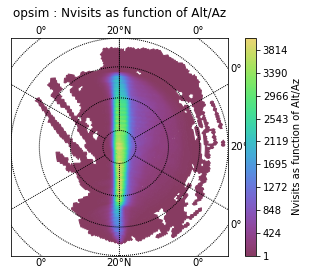

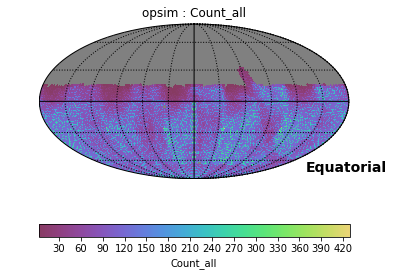

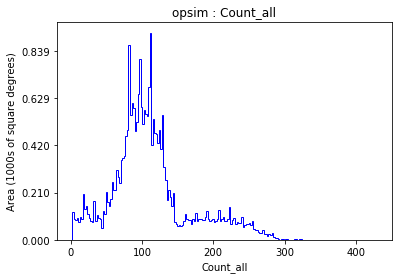

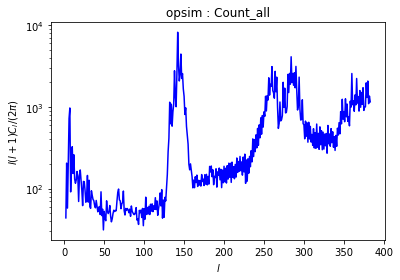

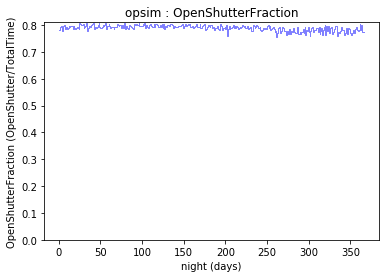

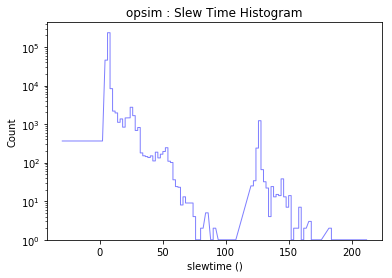

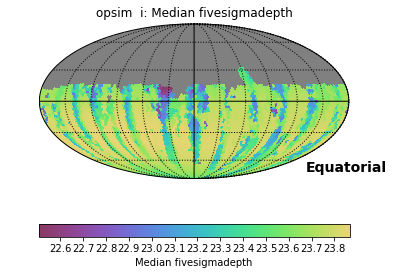

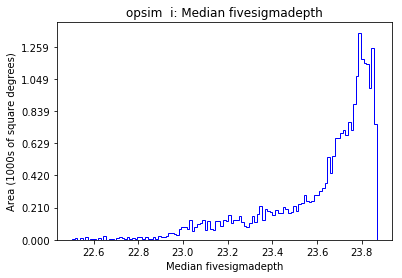

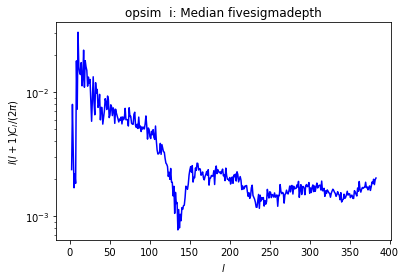

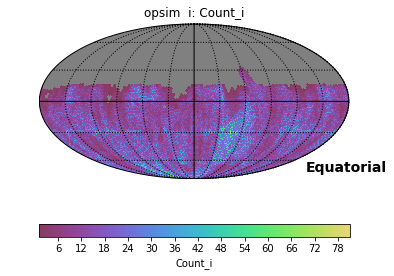

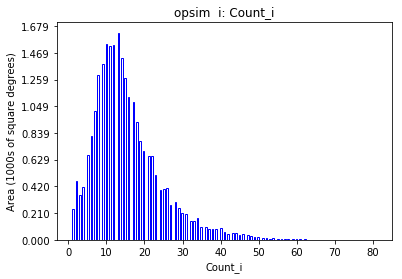

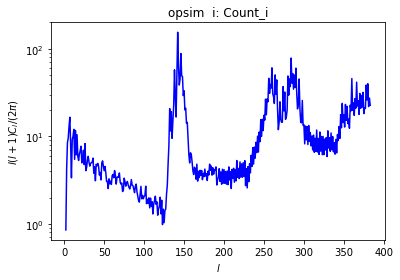

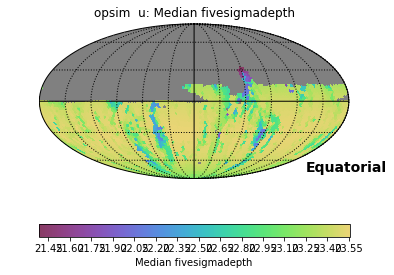

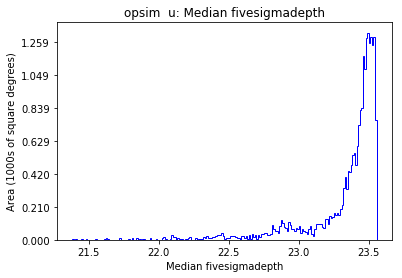

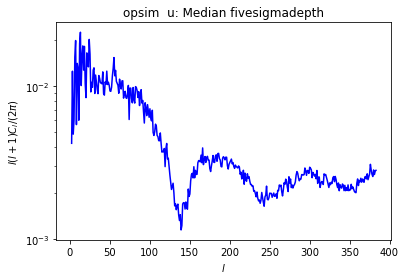

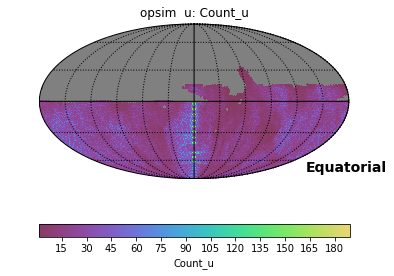

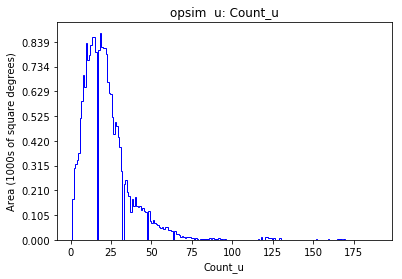

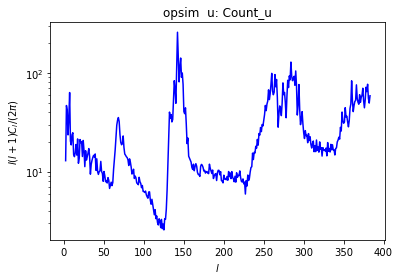

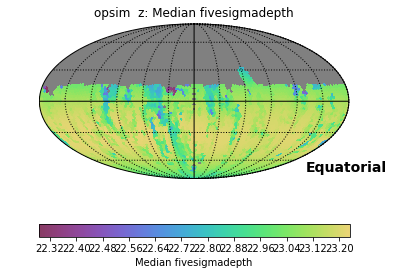

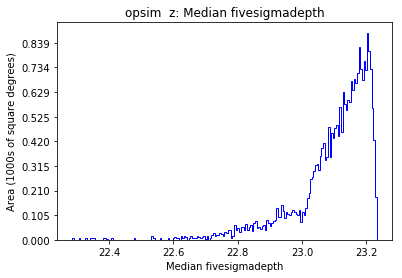

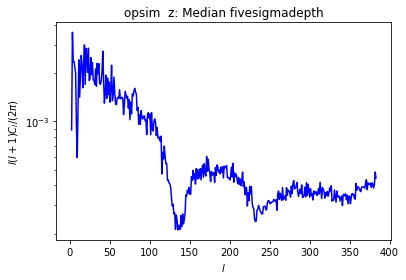

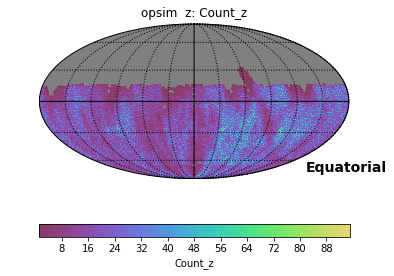

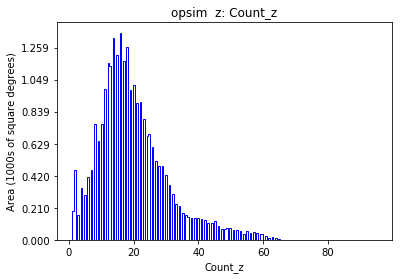

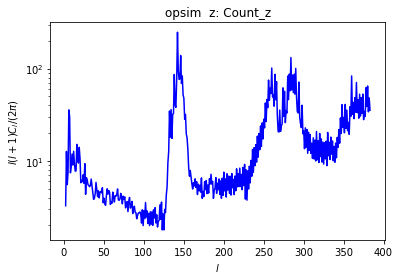

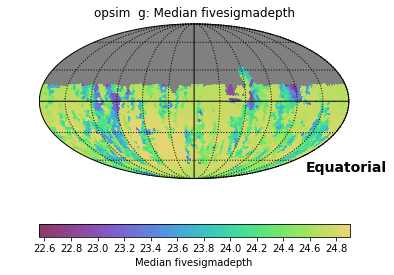

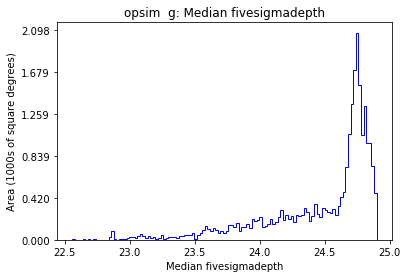

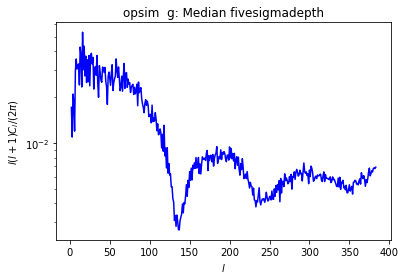

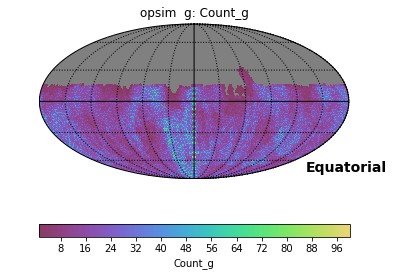

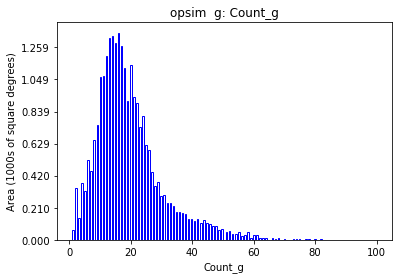

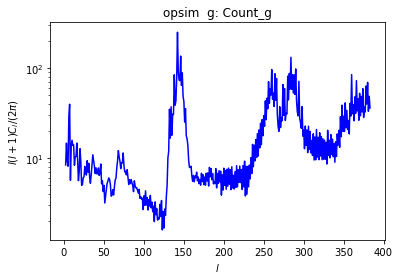

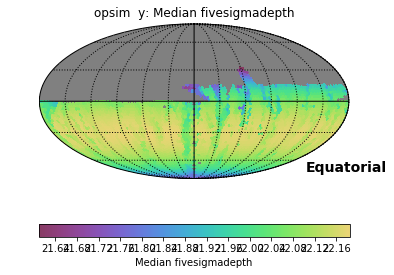

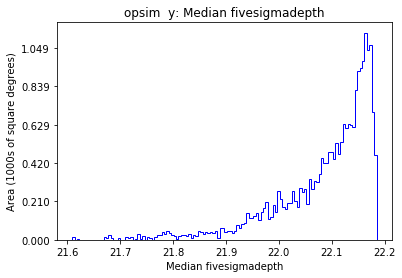

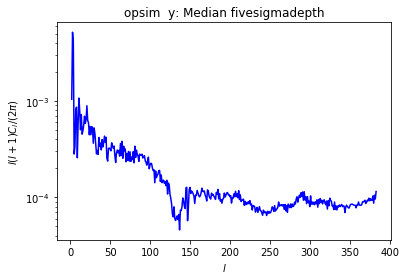

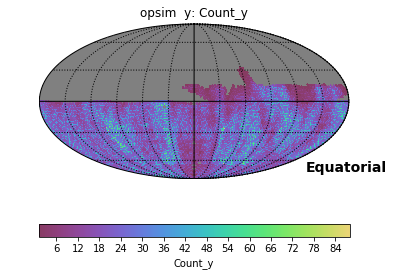

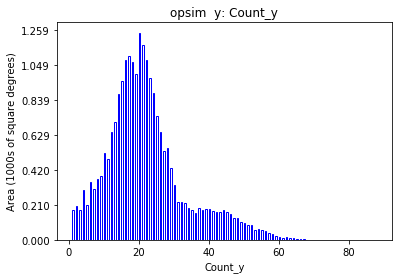

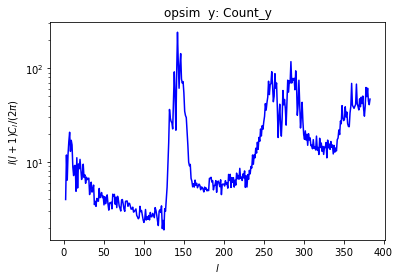

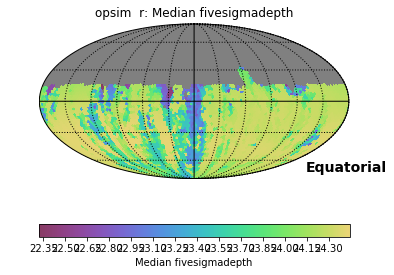

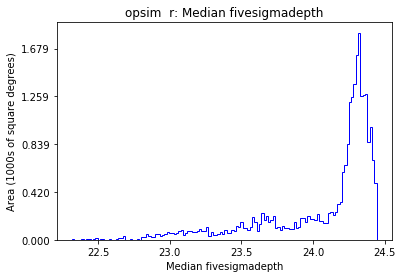

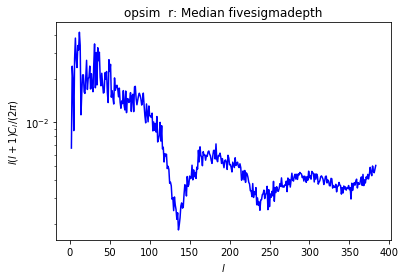

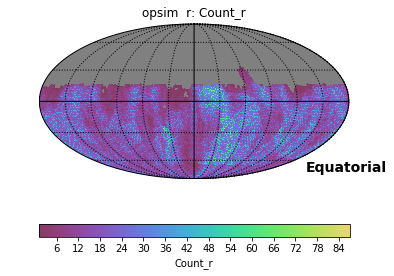

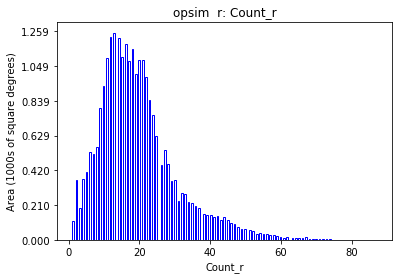

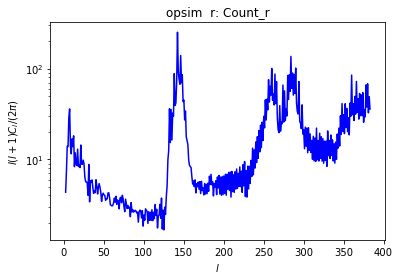

In [8]:
group.plotAll(closefigs=False)

In [9]:
i=-2
print(bundleList[i].metric.name, bundleList[i].metricValues)

Mean slewtime [7.965987610615847]


In [10]:
i=-3
print(bundleList[i].metric.name, bundleList[i].metricValues)

OpenShutterFraction [0.7901809458424719]


In [11]:
bundleList = []

slicer=slicers.UniSlicer()
metric = metrics.MeanMetric(col='slewtime')
sql = 'slewtime < 100'
bundle = metricBundles.MetricBundle(metric, slicer, sql)
bundleList.append(bundle)


In [12]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
group = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir)
group.runAll()

Querying database observations with constraint slewtime < 100 for columns ['slewtime']
Found 307375 visits
Running:  ['opsim_Mean_slewtime_slewtime_lt_100_UNIS']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [13]:
i=0
print(bundleList[i].metric.name, bundleList[i].metricValues)

Mean slewtime [7.258371337977499]
